In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [75]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/fashion.csv')
dataset.head()

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


In [76]:
import cv2
from skimage.io import imread
import tensorflow as tf
from keras.applications.resnet import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors

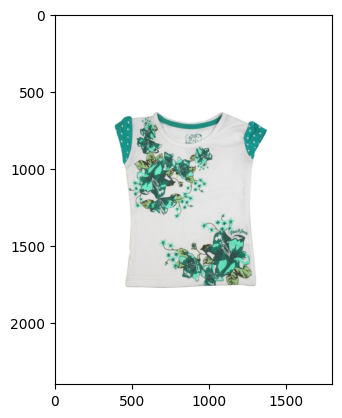

In [77]:
a = imread(dataset['ImageURL'][0])
plt.imshow(a)

In [78]:
model = ResNet50(weights = 'imagenet', input_shape = (224,224, 3), include_top = False)
model.trainable = False
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.save('model_file.h5')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_3 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [79]:
def extract_features_from_img(img_path, model) :
    print(type(img_path))
    img = imread(img_path)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    img_expanded = np.expand_dims(img, axis = 0)
    preprocessed = preprocess_input(img_expanded)
    result = model.predict(preprocessed).flatten()
    normalised = result / norm(result)
    return normalised

In [80]:
filenames = dataset['ImageURL'].to_list()

In [64]:
'''import tqdm
features = []
for file in filenames:
    features.append(extract_features_from_img(file, model))
print(len(features))'''

'import tqdm\nfeatures = []\nfor file in filenames:\n    features.append(extract_features_from_img(file, model))\nprint(len(features))'

In [65]:
'''ss = pickle.dumps(features)
with open('file.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(features, file)'''

"ss = pickle.dumps(features)\nwith open('file.pkl', 'wb') as file:\n    # A new file will be created\n    pickle.dump(features, file)"

In [81]:
import os
# Define the file path
file_path = '/content/drive/MyDrive/MyFiles/file.pkl'

In [ ]:
import pickle
# Your existing code for extracting features
import tqdm

features = []
for file in filenames:
    features.append(extract_features_from_img(file, model))

# Save the pickled file
with open(file_path, 'wb') as file:
    pickle.dump(features, file)

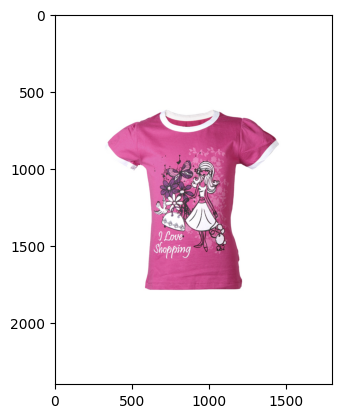

In [69]:
a = imread(filenames[3])
plt.imshow(a)

In [70]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
neighbours.fit(features)
distance, indices = neighbours.kneighbors([extract_features_from_img(filenames[3], model)])

<class 'str'>
1/1 [==============================] - 0s 184ms/step


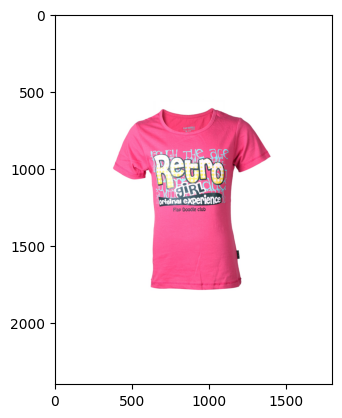

In [71]:
img1 = imread(filenames[indices[0][1]])
plt.imshow(img1)

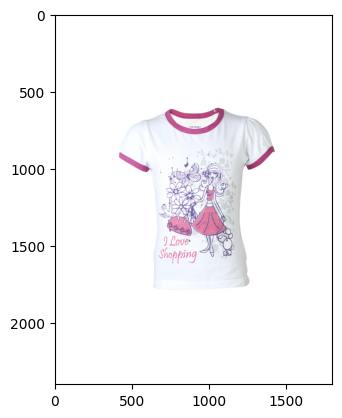

In [72]:
img2 = imread(filenames[indices[0][2]])
plt.imshow(img2)

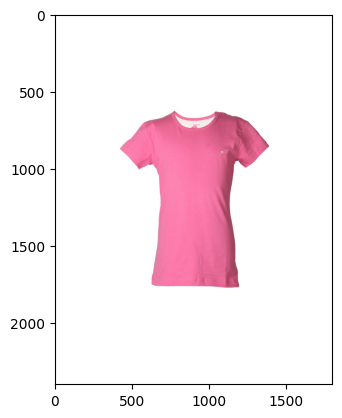

In [73]:
img3 = imread(filenames[indices[0][3]])
plt.imshow(img3)